In [1]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

In [4]:
train = pd.read_csv("C:/Users/DEEPAK KUMAR/Downloads/HR/train.csv")
test1 = pd.read_csv("C:/Users/DEEPAK KUMAR/Downloads/HR/test.csv")

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.shape

(54808, 14)

C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

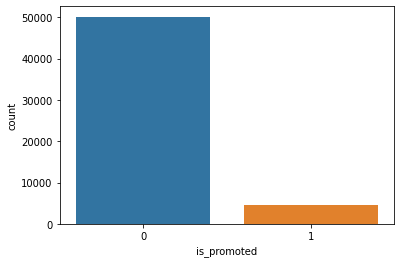

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

sns.countplot(train.is_promoted)

In [8]:
del train['employee_id']
test = test1.drop(columns= ['employee_id'])

In [9]:
cats = [c for c in train.columns if train[c].dtypes=='object']
nums = [c for c in train.columns if c not in cats]
print(cats)
print(nums)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [10]:
true_cats = ['department', 'region', 'education', 'gender', 'recruitment_channel','awards_won?', 
             'previous_year_rating','length_of_service', 'no_of_trainings']


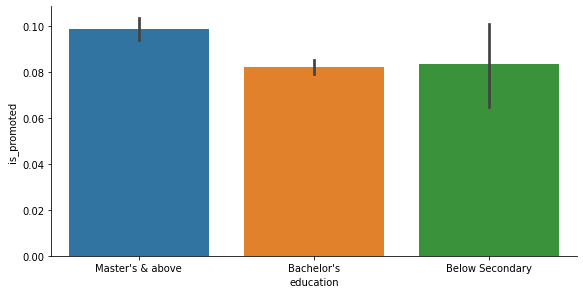

In [11]:
sns.catplot(x="education", y="is_promoted", kind="bar", data=train, height=4, aspect=2)

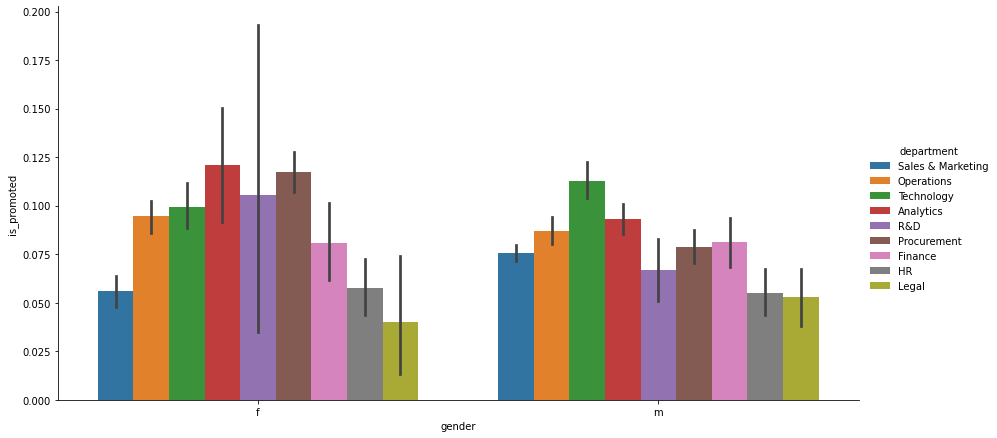

In [12]:
sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=train, height=6, aspect=2)

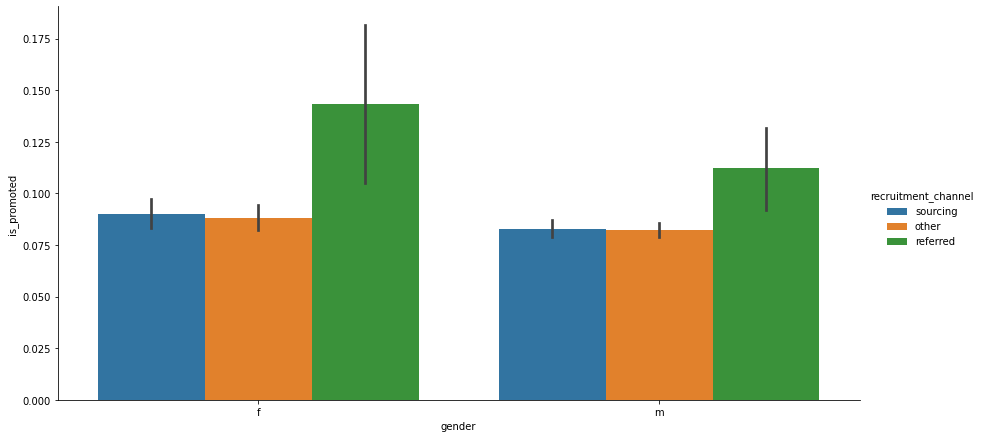

In [13]:
sns.catplot(x="gender", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=2)

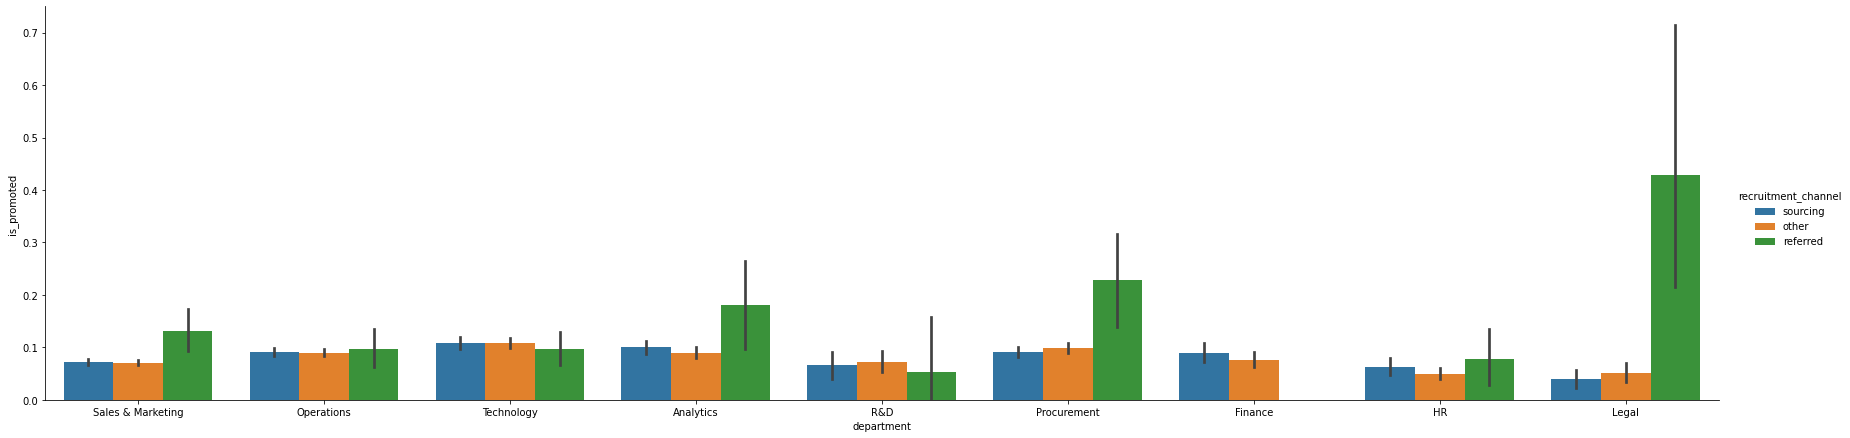

In [14]:
sns.catplot(x="department", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=4)


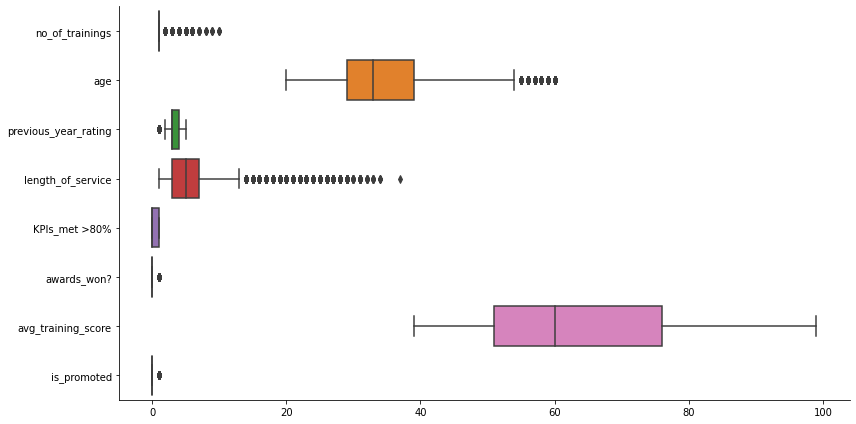

In [15]:
sns.catplot(data=train, orient="h", kind="box", height=6, aspect=2)

In [16]:
true_nums = [c for c in train.columns if c not in true_cats]
true_nums.remove('is_promoted')

C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

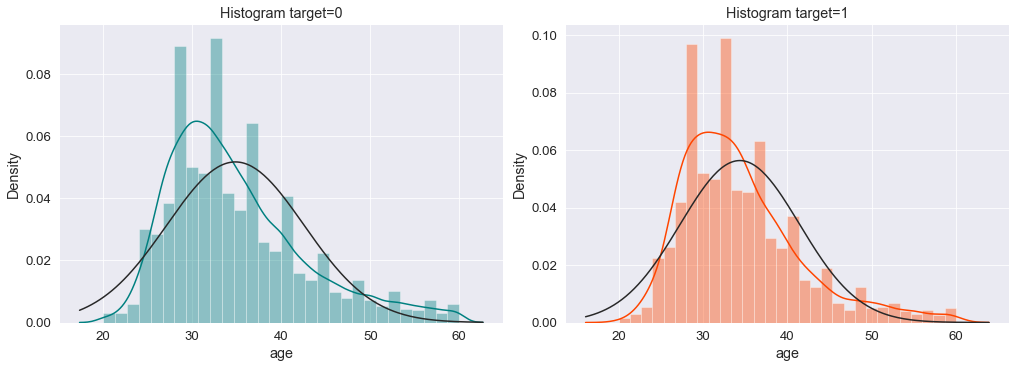

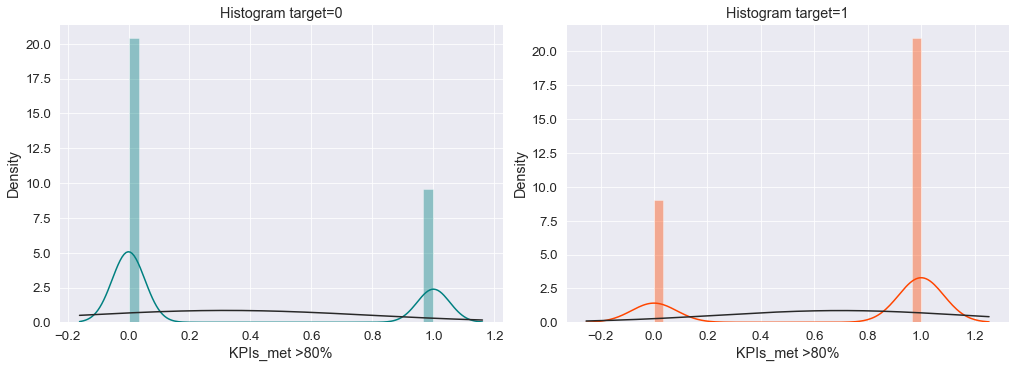

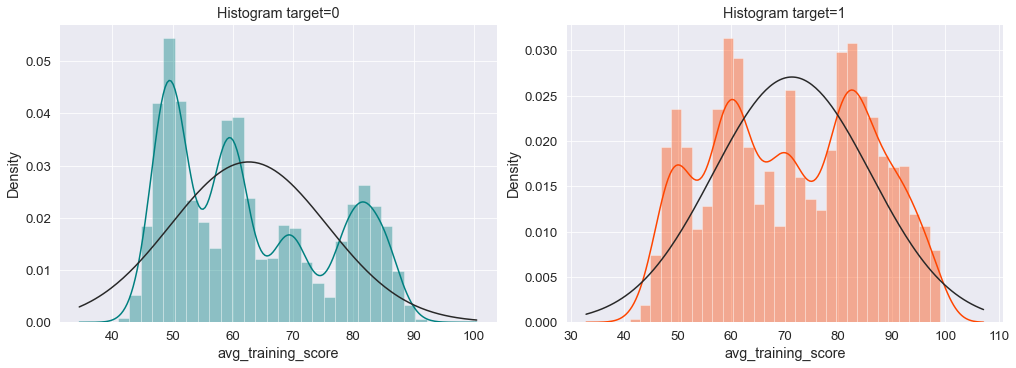

In [17]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    
    fig = plt.figure(constrained_layout=True, figsize=(14,5))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram target=0')
    sns.distplot(train[train.is_promoted==0].loc[:,c].dropna(),bins=30, fit=norm, norm_hist=True,color='teal' , ax = ax1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Histogram target=1')
    sns.distplot(train[train.is_promoted==1].loc[:,c].dropna(), bins=30, fit=norm, norm_hist=True,color='orangered' , ax = ax2)

In [18]:
missingtr = train.isnull().sum()
missingtr[missingtr>0]

education               2409
previous_year_rating    4124
dtype: int64

In [19]:
missingts = test.isnull().sum()
missingts[missingts>0]

education               1034
previous_year_rating    1812
dtype: int64

C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

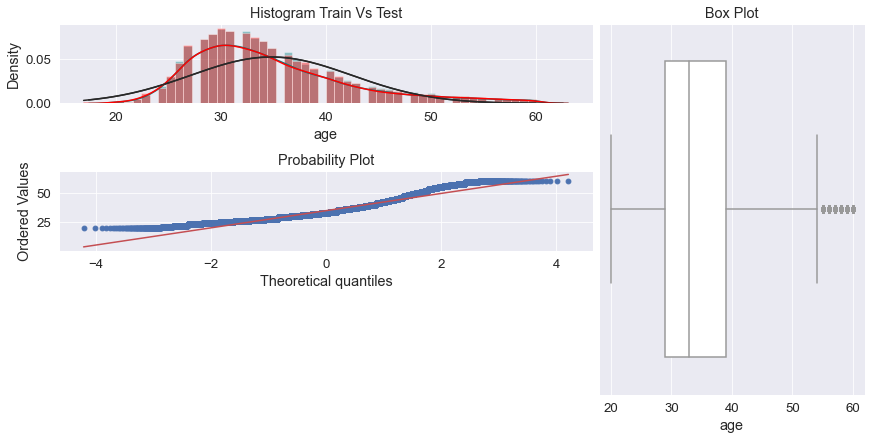

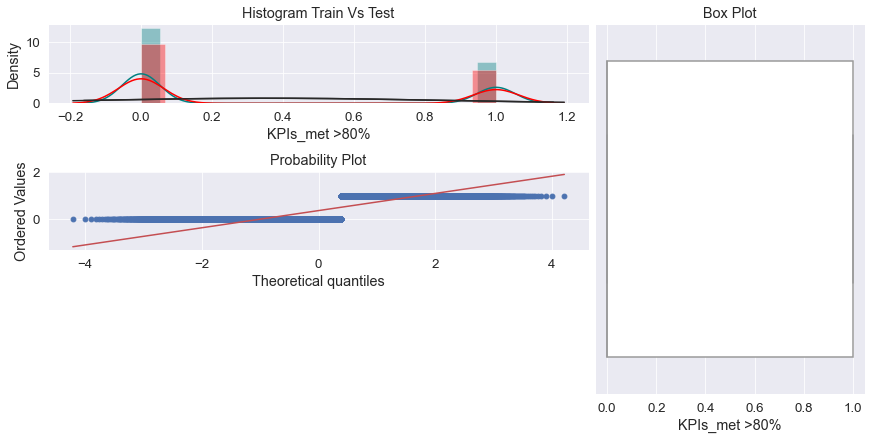

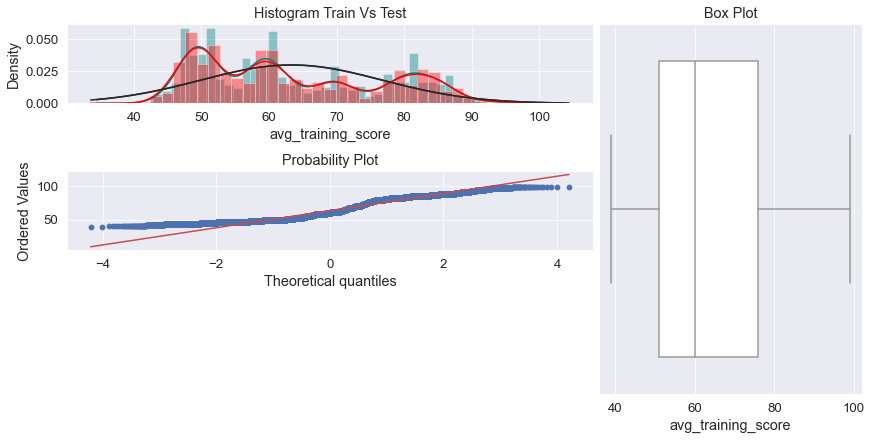

In [21]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram Train Vs Test')
    ## plot the histogram. 
    sns.distplot(train.loc[:,c].dropna(),fit=norm, norm_hist=True,color='teal' , ax = ax1)
    sns.distplot(test.loc[:,c].dropna(),  fit=norm, norm_hist=True,color='red' , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,c].dropna(), plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(train.loc[:,c].dropna(), orient='v', ax = ax3, color='white' );

## Outliers

In [22]:
train = train[train.length_of_service<30]

<AxesSubplot:>

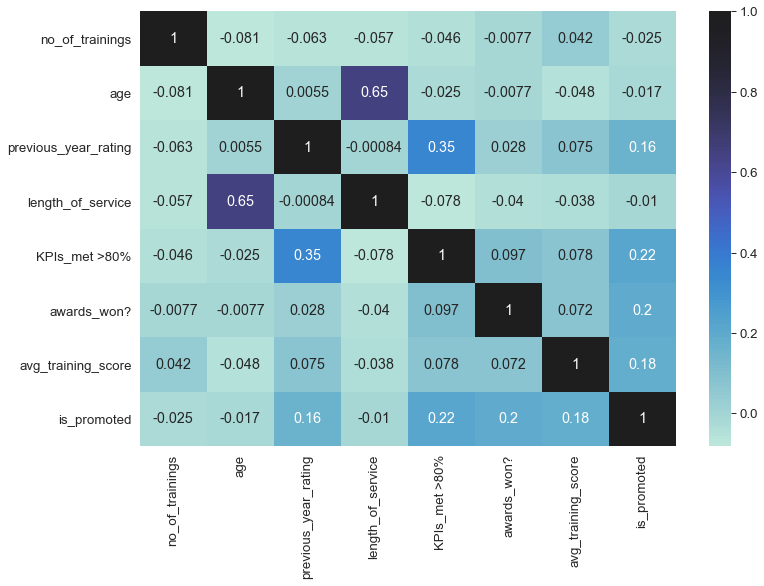

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(train, columns=train.columns).corr(), annot=True, center=True)


Building Several data with different cat encodings¶

## Imputation

### Fill Null Values

In [24]:
from sklearn.impute import SimpleImputer
target = train.pop('is_promoted')

data = pd.concat([train, test], axis=0)
si = SimpleImputer(strategy= 'most_frequent')
data['education'] = si.fit_transform(data.education.values.reshape(-1, 1))
si = SimpleImputer(strategy='mean')
data['previous_year_rating'] = si.fit_transform(data.previous_year_rating.values.reshape(-1, 1))
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Unique values

In [25]:
for i in data.columns:
    print(i)
    print("###############################33####################")
    print(data[i].unique())

department
###############################33####################
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region
###############################33####################
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education
###############################33####################
["Master's & above" "Bachelor's" 'Below Secondary']
gender
###############################33####################
['f' 'm']
recruitment_channel
###############################33####################
['sourcing' 'other' 'referred']
no_of_trainings
###############################33####################
[

In [26]:
data.drop(columns='KPIs_met >80%',inplace = True)

## label encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
datal = data.copy()
for c in cats:
    le = LabelEncoder()
    datal[c] = le.fit_transform(datal[c])
    
train_le = datal.iloc[:len(train)]
test_le = datal.iloc[len(train):]
train_le.shape, test_le.shape

((54752, 11), (23490, 11))

In [28]:
data_oh = pd.get_dummies(data)
train_oh = data_oh.iloc[:len(train)]
test_oh = data_oh.iloc[len(train):]
train_oh.shape, test_oh.shape

((54752, 57), (23490, 57))

<AxesSubplot:>

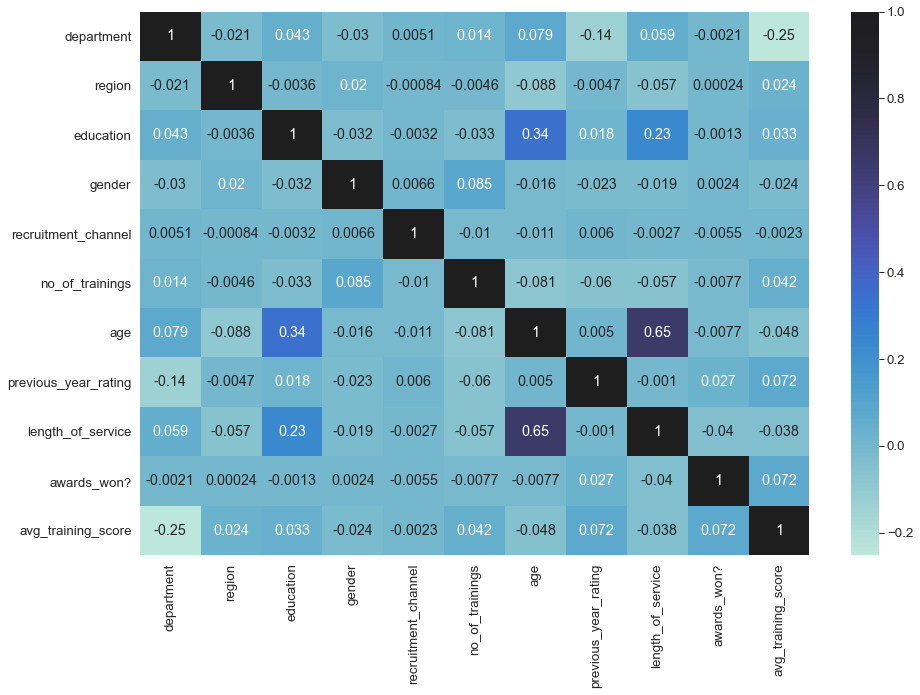

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(train_le.corr(), annot=True, center=True)

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler
ss = StandardScaler()
train_le = ss.fit_transform(train_le)
test_le = ss.fit_transform(test_le)

train_oh = ss.fit_transform(train_oh)
test_oh = ss.fit_transform(test_oh)

## The F1-score is higher than the SVM results.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
scores = []
oof = np.zeros(len(train))
y_le = target.values
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train_le, y_le)):
    print('fold:', fold_)
    X_tr, X_test = train_le[train_ind], train_le[val_ind]
    y_tr, y_test = y_le[train_ind], y_le[val_ind]
    clf = LogisticRegression(max_iter=200, random_state=2020)
    clf.fit(X_tr, y_tr)
    oof[val_ind]= clf.predict_proba(X_test)[:, 1]
    y = clf.predict_proba(X_tr)[:,1] 
    print('train:',roc_auc_score(y_tr, y),'val :' , roc_auc_score(y_test, (oof[val_ind])))
    print(20 * '-')
    
    scores.append(roc_auc_score(y_test, oof[val_ind]))
    
    
    
print('log reg  roc_auc=  ', np.mean(scores))
np.save('oof_rf', oof)

fold: 0
train: 0.743968035096586 val : 0.7328944555748207
--------------------
fold: 1
train: 0.74153644114492 val : 0.7433955428995225
--------------------
fold: 2
train: 0.7378488001035701 val : 0.7574984798083344
--------------------
fold: 3
train: 0.7419750665435167 val : 0.741576779282294
--------------------
fold: 4
train: 0.7443375151897897 val : 0.7323859727851719
--------------------
log reg  roc_auc=   0.7415502460700287


In [31]:
from sklearn.metrics import *
oof_rnd = np.where(oof > 0.5, 1, 0)

f1_score(target, oof_rnd)

0.1382381413359148

In [32]:
recall_score(target, oof_rnd)

0.07652733118971061

In [33]:
#Logistic with one-hot encoded data

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
scores = []
oof = np.zeros(len(train_oh))
y_le = target.values
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train_oh, y_le)):
    print('fold:', fold_)
    X_tr, X_test = train_oh[train_ind], train_oh[val_ind]
    y_tr, y_test = y_le[train_ind], y_le[val_ind]
    clf = LogisticRegression(max_iter=200, random_state=2020)
    clf.fit(X_tr, y_tr)
    oof[val_ind]= clf.predict_proba(X_test)[:, 1]
    y = clf.predict_proba(X_tr)[:,1] 
    print('train:',roc_auc_score(y_tr, y),'val :' , roc_auc_score(y_test, (oof[val_ind])))
    print(20 * '-')
    
    scores.append(roc_auc_score(y_test, oof[val_ind]))
    
    
    
print('log reg  roc_auc=  ', np.mean(scores))
np.save('oof_rf', oof)

fold: 0
train: 0.7931202718718571 val : 0.7819824102253672
--------------------
fold: 1
train: 0.7897501709069539 val : 0.79278434937156
--------------------
fold: 2
train: 0.7868061847019592 val : 0.804318671120831
--------------------
fold: 3
train: 0.7930340720726938 val : 0.7815370354855481
--------------------
fold: 4
train: 0.7943494182608088 val : 0.7806564317616108
--------------------
log reg  roc_auc=   0.7882557795929834


In [35]:
oof_rnd = np.where(oof > 0.5, 1, 0)
f1_score(target, oof_rnd)

0.44655426420036015

In [36]:
recall_score(target, oof_rnd)

0.292390139335477

In [37]:
class_names=np.array(['0','1'])

# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
y = target
x = train_le


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.42902,random_state=1)

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9215021431770201
test accuracy: 0.9214133673903789


In [48]:
x_test.shape

(23490, 11)

In [58]:
test.shape

(23490, 12)

In [39]:
from sklearn.metrics import classification_report
prediction_SVM_all = svm.predict(x_test)
print(classification_report(y_test, prediction_SVM_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22446
           1       0.74      0.09      0.16      2044

    accuracy                           0.92     24490
   macro avg       0.83      0.54      0.56     24490
weighted avg       0.91      0.92      0.89     24490



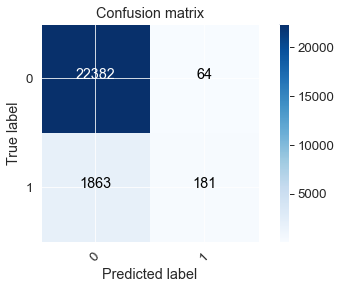

In [40]:
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [49]:
y = target
x = train_oh

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.42902,random_state=1)

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [50]:
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9267161410018553
test accuracy: 0.925968497232865


In [51]:
y_test.shape

(23490,)

In [52]:
test.shape

(23490, 12)

In [53]:
prediction_SVM_all = svm.predict(x_test)
print(classification_report(y_test, prediction_SVM_all, target_names=class_names))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     21529
           1       0.87      0.13      0.23      1961

    accuracy                           0.93     23490
   macro avg       0.90      0.57      0.60     23490
weighted avg       0.92      0.93      0.90     23490



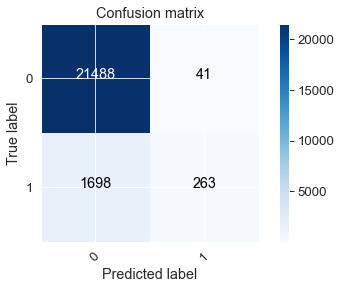

In [54]:
prediction_SVM_all = svm.predict(x_test)
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(x_train,y_train)
print("%.4f" % rf.oob_score_)

0.9338


In [56]:
y_pred = rf.predict(x_test)

In [57]:
y_pred.shape

(23490,)

In [58]:
rf.feature_importances_

array([0.01979602, 0.09268898, 0.06724423, 0.07836791, 0.0590208 ,
       0.35956678, 0.01277504, 0.00819401, 0.0057032 , 0.00287746,
       0.02090905, 0.01231699, 0.00528384, 0.0369653 , 0.01113682,
       0.00336784, 0.00370747, 0.00438034, 0.00213707, 0.00684701,
       0.00439064, 0.00749641, 0.00476873, 0.00605003, 0.00050902,
       0.00365984, 0.00979933, 0.00357885, 0.00151995, 0.00860546,
       0.00678038, 0.00152921, 0.00443811, 0.00574649, 0.00569681,
       0.00531208, 0.00298971, 0.00325517, 0.00437593, 0.00488476,
       0.002669  , 0.00123127, 0.00079961, 0.00695507, 0.00217921,
       0.00217515, 0.00879293, 0.00388916, 0.00092353, 0.00679552,
       0.00150042, 0.0063047 , 0.00943368, 0.00962571, 0.01107987,
       0.0057326 , 0.01123951])

In [59]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:5]

,variable,importance
5,age,0.359567
1,education,0.092689
3,recruitment_channel,0.078368
2,gender,0.067244
4,no_of_trainings,0.059021


In [62]:
test1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0


In [61]:
test1['is_promoted']=y_pred

In [63]:
output = test1[['employee_id','is_promoted']]

In [64]:
output.to_csv("Random_sub.csv",index=False)

In [65]:
output.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
